### Pacotes necessários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras

### Dados

In [2]:
df = pd.read_csv('academicos_historico_balanceado.csv')
#df.head()

In [3]:
#df.describe()

In [ ]:
colunas = df.columns
lista_colunas = list(df.columns)
#lista_colunas

In [5]:
lista_colunas.remove('chave')
lista_colunas.remove('evadido')
#lista_colunas

In [6]:
x = df[lista_colunas]
y = df['evadido']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18)

### Definição do modelo

Adição de camadas, atribuindo neurônios e definindo como será o formato da entrada

In [8]:
model = keras.Sequential()

model.add(keras.layers.Dense(25, input_dim=25, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(15,activation='tanh'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(5, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

c:\Users\bsabd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


loss: avaliação de como estão as estimativas

optimizer: forma de corrigir os pesos baseado no loss

In [9]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

### Treinamento

In [10]:
history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.5005 - loss: 0.3736
Epoch 2/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.5023 - loss: 0.2489
Epoch 3/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5071 - loss: 0.2477
Epoch 4/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5142 - loss: 0.2482
Epoch 5/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5103 - loss: 0.2473
Epoch 6/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5092 - loss: 0.2474
Epoch 7/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.5063 - loss: 0.2477
Epoch 8/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.5077 - loss: 0.2478
Epoch 9/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5013 - loss: 0.2476
Epoch 10/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.5087 - loss: 0.2470
Epoch 11/500
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5569 - loss: 0.2398
Epoch 12/500
540/54

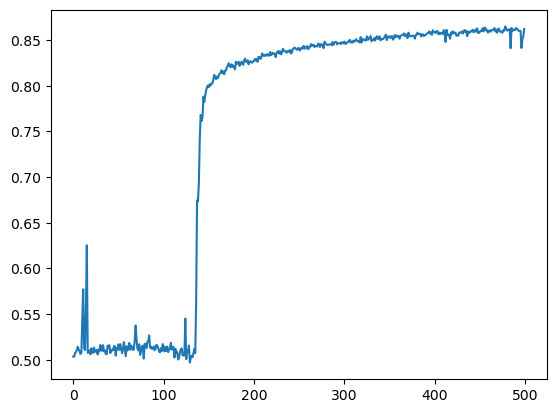

In [11]:
plt.plot(history.history['accuracy'])
plt.show()

In [12]:
loss, metrics = model.evaluate(X_test, y_test)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8180 - loss: 0.1367


In [13]:
print(f'Loss: {loss}')

Loss: 0.1318776160478592


In [14]:
y_pred = model.predict(X_test)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


# Nova Rede
Sugestão ChatGPT

In [17]:
from tensorflow.keras.optimizers import Adam

In [18]:
model = keras.Sequential()

model.add(keras.layers.Dense(128, input_dim=25, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

In [26]:
#history = model.fit(X_train, y_train, epochs=50, batch_size=32)
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.8990 - loss: 0.0775
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.8984 - loss: 0.0759
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.9016 - loss: 0.0738
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8981 - loss: 0.0772
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.9018 - loss: 0.0753
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9001 - loss: 0.0755
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9004 - loss: 0.0741
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8982 - loss: 0.0771
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.9006 - loss: 0.0763
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9006 - loss: 0.0764
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9012 - loss: 0.0744
Epoch 12/50
540/540 ━━━━━━━━━━

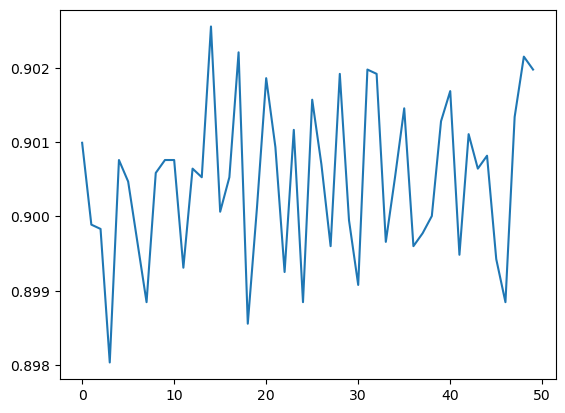

In [27]:
plt.plot(history.history['accuracy'])
plt.show()

In [28]:
loss, metrics = model.evaluate(X_test, y_test)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8892 - loss: 0.0853
